### Heart Rate Measurement using the **Green Channel**


In [1]:
# ------Import standard libraries------
import math
import cv2
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft
# import the cv2_imshow function  from patches to use in Google Collab
# import functions from the scipy.signal module for signal processing
from scipy.signal import butter, filtfilt, find_peaks
import scipy.signal as signal
#import and mount the drive module to access files and directories from Google Drive
import pandas as pd

In [2]:
 #------Function that detects where the face is located------
 # Returns the coordenates of the detected faces of the region of interest (ROI).
 # Uses OpenCV's pre-trained Haar cascade classifier

def detect_roi(gray):
  # haarcascade_frontalface_default.xml' is the name of the pre-trained Haar cascade classifier file from OpenCV.
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  faces = face_cascade.detectMultiScale(gray, scaleFactor=1.6, minNeighbors=5)
  roi = frame[faces[0,1]:(faces[0,1]+faces[0,3]), faces[0,0]:(faces[0,0]+faces[0,2])]
  # (x,y,width,length)
  return faces,roi

In [3]:
#------Function that applies a butterworth bandpass filter to a signal------
# Returns the filtered signal

def butter_bandpass_filter(signal, lowcut, highcut, fs):
    # Nyquist frequency = sampling rate (fps) / 2
    nyq = fs/2
    low = lowcut / nyq
    high = highcut / nyq
    order = 3
    b, a = butter(order, [low, high], btype='band')
    filtered = filtfilt(b, a, signal)
    return filtered

In [4]:
#------Open the video file------
# copy the path where the video file is located
cap = cv2.VideoCapture('Juan60.mp4')

In [5]:
#------Initialize variables for heart rate calculation------
fps = cap.get(cv2.CAP_PROP_FPS)
fps = round(fps)
print("Frames per second:",fps)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("Frame count:",frame_count) #Full video
signal_video = []

Frames per second: 60
Frame count: 7002


In [6]:
#------Calculate the initial and final frame------

# first 10 seconds of the video
initial_frame = int(10*fps)
# 60 seconds after the initial frame
final_frame = int(initial_frame + fps*60)

#------Loop through each frame in the video (70 seconds) to extract the green channel ------
for i in range(1, final_frame):

    # read the frame
    ret, frame = cap.read()

    # extract the green channel of 60 seconds of video without considering the first 10 seconds
    if i>=initial_frame and i<final_frame:

      # convert the frame to grayscale
      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

      # detect the ROI
      faces,roi = detect_roi(gray)
      #cv2_imshow(roi) #--﹥ uncomment to show the image of the ROI on the current frame
      #print(faces)    #--﹥ uncomment to print the detected faces on the current frame

      # extract the green channel from the ROI
      green_channel = roi[:,:,1]

      # normalize the green channel
      green_channel = cv2.normalize(green_channel, None, 0, 255, cv2.NORM_MINMAX)

      # add the green channel of the current frame to the signal
      signal_video.append(np.mean(green_channel))

# release the video file and close all windows
cap.release()
cv2.destroyAllWindows()

# print the number of frames used to obtain the signal
print(len(signal_video))

# convert to NumPy array
signal_video = np.array(signal_video)
# print(filtered_signal) #--﹥ uncomment to print the signal

3600


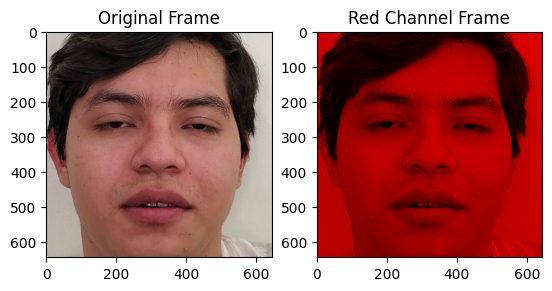

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



# Supongamos que ya tienes el frame almacenado en la variable "frame"

# Extraer el canal rojo
red_channel = roi[:, :, 2]  # El índice 2 corresponde al canal rojo en OpenCV

# Crear una imagen en blanco con solo el canal rojo
red_frame = np.zeros_like(roi)
red_frame[:, :, 2] = red_channel  # Establecer el canal rojo en la nueva imagen

# Mostrar el frame original y el frame con solo el canal rojo usando matplotlib
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.title('Original Frame')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(red_frame, cv2.COLOR_BGR2RGB))
plt.title('Red Channel Frame')

plt.show()


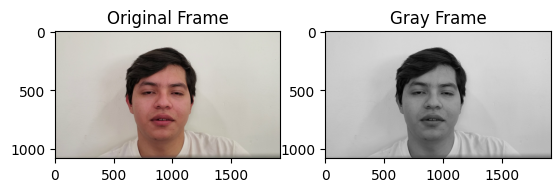

In [8]:


# Mostrar el frame original y el frame con solo el canal rojo usando matplotlib
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title('Original Frame')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.title('Gray Frame')

plt.show()


In [9]:
# Dibujar rectángulos encima de la imagen "frame" usando las coordenadas de "faces"
for (x, y, w, h) in faces:
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Mostrar la imagen resultante con los rectángulos
cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'cv2_imshow' is not defined

In [ ]:
import cv2

# Cargar la imagen
image = frame
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Cargar clasificadores preentrenados
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
nose_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_mcs_nose.xml')
mouth_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_mcs_mouth.xml')

# Detección de rostros
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

# Detección de ojos, nariz y boca dentro de cada rostro detectado
for (x, y, w, h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

 #   noses = nose_cascade.detectMultiScale(roi_gray)
  #  for (nx, ny, nw, nh) in noses:
   #     cv2.rectangle(roi_color, (nx, ny), (nx+nw, ny+nh), (0, 0, 255), 2)

   # mouths = mouth_cascade.detectMultiScale(roi_gray)
   # for (mx, my, mw, mh) in mouths:
   #     cv2.rectangle(roi_color, (mx, my), (mx+mw, my+mh), (255, 0, 0), 2)

# Mostrar la imagen con los rectángulos
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:

# Supongamos que ya tienes el roi almacenado en la variable "roi"

# Extraer el canal rojo
red_channel = roi[:, :, 2]  # El índice 2 corresponde al canal rojo en OpenCV

# Crear una imagen en blanco con solo el canal rojo
red_frame = np.zeros_like(roi)
red_frame[:, :, 2] = red_channel  # Establecer el canal rojo en la nueva imagen

# Mostrar el frame original y el frame con solo el canal rojo usando matplotlib
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.title('Original Frame')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(red_frame, cv2.COLOR_BGR2RGB))
plt.title('Red Channel Frame')

# Dividir el canal rojo en cuadros pequeños y mostrar los valores
plt.figure(figsize=(10, 5))
plt.title('Valores del Canal Rojo en Cuadros Pequeños')

height, width = red_channel.shape
num_rows = 5
num_cols = 10

for i in range(num_rows):
    for j in range(num_cols):
        row_start = int(i * (height / num_rows))
        row_end = int((i + 1) * (height / num_rows))
        col_start = int(j * (width / num_cols))
        col_end = int((j + 1) * (width / num_cols))

        roi_chunk = red_channel[row_start:row_end, col_start:col_end]
        mean_value = np.mean(roi_chunk)

        plt.text(
            j * (width / num_cols) + (width / (2 * num_cols)),
            i * (height / num_rows) + (height / (2 * num_rows)),
            f'{mean_value:.2f}',
            color='white' if mean_value > 100 else 'black',
            ha='center',
            va='center',
            fontsize=8
        )

        plt.gca().add_patch(plt.Rectangle((col_start, row_start), col_end - col_start, row_end - row_start, fill=None, edgecolor='red'))

plt.axis('off')
plt.show()


In [11]:
#------Apply a bandpass filter to remove noise from the signal------
# lowcut freq  -->  60 bpm = 1 Hz
# highcut freq -->  100 bpm = 1.67 Hz

filtered_signal = butter_bandpass_filter(signal_video, 1.0, 1.6, fps)
# print(filtered_signal) #--﹥ uncomment to print the filtered signal)


In [12]:
#------Calculate the Fast Fourier Transform of the filtered signal ------
fft = np.fft.fft(filtered_signal)
#print(fft) --﹥ uncomment to print the fft

# find the array of frequencies of each element in the FFT
freqs = np.fft.fftfreq(filtered_signal.size, 1/fps)

# find the peaks of the FFT
peaks, _ = find_peaks(np.abs(fft))

# print the number of peaks
print(len(peaks))

# find the index of the highest peak
max_peak_index = np.argmax(np.abs(fft[peaks]))


136


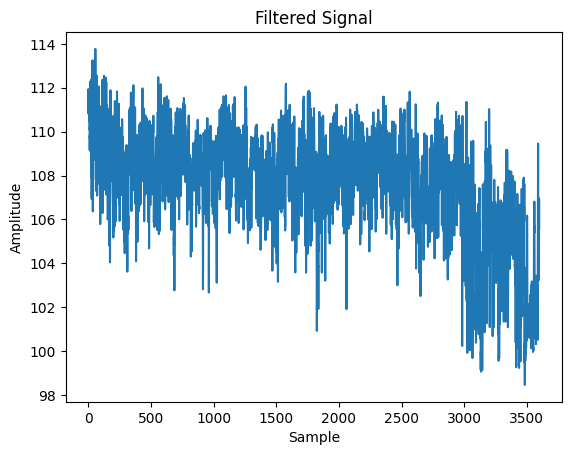

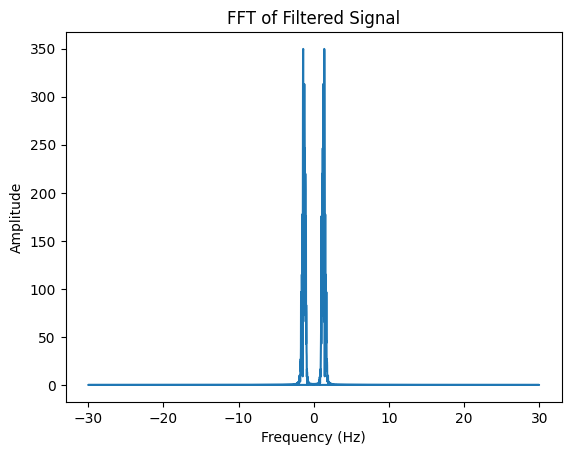

In [13]:
#------Plot the filtered signal------
plt.plot(signal_video)
plt.title('Filtered Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

#------Plot the FFT------
plt.figure()
plt.plot(freqs, np.abs(fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of Filtered Signal')
plt.show()

In [14]:
#------Calculate the Heart Rate using the peak frequency------

# Identify the peak frequency that corresponds to the heart rate an convert to bpm
heart_rate = freqs[peaks][max_peak_index] * 60

# Print the heart rate
print("Heart rate: {:.2f} bpm".format(heart_rate))

Heart rate: 84.00 bpm


In [15]:
#------Compare to the heart rate calculated from pulse oximeter measurements------

# import the pulse oximeter .csv file
data_video= pd.read_csv('juan_60_20230429154535.csv')

# extract the data from the PULSE column
pulse_signal = data_video['PULSE']

# eliminate the first 10 seconds and and take the next 60 values of the signal
pulse_signal = pulse_signal[47:107]

# print the size of the signal (must be 60 for 60 seconds)
print("Signal size:", pulse_signal.size)

# calculate and print the average value of the Heart Rate
heart_rate_csv = np.mean(pulse_signal)
print("\nHeart rate: {:.2f} bpm".format(heart_rate_csv))

# calculate and print the error
error=abs(heart_rate-heart_rate_csv)
print("\nError: {:.2f} bpm".format(error))

Signal size: 60

Heart rate: 85.35 bpm

Error: 1.35 bpm
